In [1]:
# import needed libraries
import sys
from collections import OrderedDict

from matplotlib import pyplot as plt

# path of local project
folder_path = "/home/jiaxiangyi/Documents/rvesimulator"
sys.path.insert(0, folder_path)

import rvesimulator
from rvesimulator.design_of_experiment.samplers import FixNumberSampler
from simulator_caller import SimulatorCaller

In [3]:
# define the design space
doe_variables = OrderedDict({"vol_req": 0.30})

# define number of samples
num_points = 3
# define the information of outputs
name_outputs = ["vol_frac", "PK2", "Green_strain"]
doe_sampler = FixNumberSampler()
doe_sampler.sampling(
    num_samples=num_points,
    design_space=doe_variables,
    out_names=name_outputs,
    seed=123456,
) 
doe_sampler.data

{'samples':    vol_req
 0      0.3
 1      0.3
 2      0.3,
 'responses':   vol_frac  PK2 Green_strain
 0      NaN  NaN          NaN
 1      NaN  NaN          NaN
 2      NaN  NaN          NaN}

In [4]:
simulation_wrapper = SimulatorCaller()
simulation_wrapper.update_sim_info(print_info=True)

geometry information of RVE: {'length': 0.048, 'width': 0.048, 'radius': 0.003}
vol_req is: 0.3
Info of Abaqus simulation : {'mesh_partition': 30, 'loads': [0.05, 0.0, 0.0], 'simulation_time': 10.0} 



In [5]:
data = simulation_wrapper.run_simulation(data=doe_sampler.data)

Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s
Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/asca_rve/Data/point_0
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.09175443649292
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s
Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/asca_rve/Data/point_1
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.09188461303711
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


Time of generate the 2D RVE with volume fraction            = 0.31  is 0.01 s
Current working directory: /home/jiaxiangyi/Documents/rvesimulator/examples/asca_rve/Data/point_2
##################################################
############# START ABAQUS ANALYSIS #############
##################################################


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


Simulation successfully finished! 


*** ABAQUS/ABQcaeK rank 0 terminated by signal 15 (Terminated)

0
time cost of this iteraion: 40.083457469940186
##################################################
########### START ABAQUS POST ANALYSIS ###########
##################################################
Abaqus Error: cae exited with an error.


Abaqus License Manager checked out the following license:
"cae" from Flexnet server flexserv1.tudelft.nl
<16 out of 30 licenses remain available>.


[Text(0.5, 0, '$\\epsilon_{xx}$'), Text(0, 0.5, '$\\sigma_{xx}$ (MPa)')]

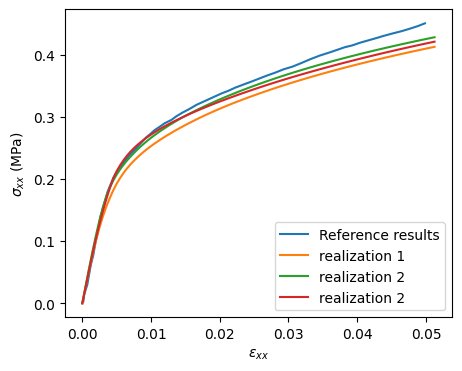

In [7]:
import pandas as pd 
samples = data["samples"]
respones = data["responses"]
exp_data = pd.read_csv("Original data.csv", header=None)
pparam = dict(xlabel="$\epsilon_{xx}$", ylabel="$\sigma_{xx}$ (MPa)")

fig, ax = plt.subplots(1,1, figsize=(5,4))
ax.plot(exp_data.loc[:, 0], exp_data.loc[:, 1], label="Reference results")
ax.plot(
    respones["Green_strain"][0][:, 0, 0],
    respones["PK2"][0][:, 0, 0],
    label="realization 1",
)
ax.plot(
    respones["Green_strain"][1][:, 0, 0],
    respones["PK2"][1][:, 0, 0],
    label="realization 2",
)
ax.plot(
    respones["Green_strain"][2][:, 0, 0],
    respones["PK2"][2][:, 0, 0],
    label="realization 2",
)
ax.legend()
ax.set(**pparam)

